____________

# Model Inference  
# Phase 1 - Milestone 2

    Name                : Pratama Waskito Prihandana
    class               : batch 003


_______________
# I. Library

In [28]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

______
# II. Load Model

In [29]:
# Save model to local directory

with open('model_scaler.pkl', 'rb') as file_1:
  model_scaler = pickle.load(file_1)
  
with open('model_kmeans.pkl', 'rb') as file_2:
  model_kmeans = pickle.load(file_2)

with open('cluster_labels.pkl', 'rb') as file_3:
  cluster_labels = pickle.load(file_3)
  
with open('model_rf.pkl', 'rb') as file_4:
  model_rf = pickle.load(file_4)
  
with open('model_gbr.pkl', 'rb') as file_5:
  model_gbr = pickle.load(file_5) 

______
# III. Load Data Inference

In [30]:
df = pd.read_csv('xdata_inference_p1ms2.csv')

In [31]:
df.head()

,Unnamed: 0,cluster,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,0,Standard Class,Home Office,Iowa,Central,Office Supplies,Fasteners,425.52,5.0,0.4,-7.03
1,1,0,First Class,Home Office,Louisiana,West,Furniture,Appliances,229.14,6.0,0.0,-31.07
2,2,0,Same Day,Corporate,Utah,Central,Technology,Labels,175.15,9.0,0.4,29.83
3,3,0,First Class,Home Office,Colorado,Central,Furniture,Envelopes,161.98,6.0,0.4,31.69
4,4,1,First Class,Corporate,Oklahoma,South,Office Supplies,Supplies,174.15,9.0,0.5,-16.39


In [32]:
df = df.drop(['Unnamed: 0','cluster'], axis=1)

In [33]:
df.tail()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
45,Same Day,Home Office,Connecticut,West,Furniture,Paper,286.14,9.0,0.4,67.60
46,First Class,Home Office,Ohio,West,Technology,Envelopes,156.08,8.0,0.1,7.88
47,First Class,Home Office,Pennsylvania,East,Furniture,Storage,70.49,4.0,0.0,-26.41
48,Standard Class,Corporate,Maryland,West,Furniture,Phones,108.49,5.0,0.0,-19.84
49,First Class,Home Office,South Carolina,Central,Technology,Storage,141.92,9.0,0.5,39.75


_____________
# IV. Clustering Model

In [34]:
num_list = ['Sales', 'Quantity', 'Discount', 'Profit']
cat_list = ['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category']

In [35]:
scaler = StandardScaler()
encoder = OrdinalEncoder()

# scaling numerical only, concatenate, assign to new dataframe
df2 = pd.DataFrame(
    np.concatenate(
        [pd.DataFrame(scaler.fit_transform(df[num_list])), pd.DataFrame(encoder.fit_transform(df[cat_list]))], 
        axis=1), 
    columns=df[num_list].columns.tolist()+df[cat_list].columns.tolist()).round(2)

In [36]:
df2.head()

,Sales,Quantity,Discount,Profit,Ship Mode,Segment,State,Region,Category,Sub-Category
0,1.48,-0.12,0.79,-0.79,3.0,2.0,8.0,0.0,1.0,8.0
1,-0.16,0.29,-1.76,-1.56,0.0,2.0,11.0,3.0,0.0,1.0
2,-0.61,1.54,0.79,0.38,1.0,1.0,29.0,0.0,2.0,10.0
3,-0.72,0.29,0.79,0.44,0.0,2.0,2.0,0.0,0.0,7.0
4,-0.62,1.54,1.43,-1.09,0.0,1.0,22.0,2.0,1.0,15.0


In [37]:
df2.tail()

,Sales,Quantity,Discount,Profit,Ship Mode,Segment,State,Region,Category,Sub-Category
45,0.32,1.54,0.79,1.59,1.0,2.0,3.0,3.0,0.0,12.0
46,-0.77,1.12,-1.12,-0.32,0.0,2.0,21.0,3.0,2.0,7.0
47,-1.49,-0.54,-1.76,-1.41,0.0,2.0,23.0,1.0,0.0,14.0
48,-1.17,-0.12,-1.76,-1.20,3.0,1.0,13.0,3.0,0.0,13.0
49,-0.89,1.54,1.43,0.70,0.0,2.0,25.0,0.0,2.0,14.0


In [38]:
# K-Means with 6 cluster
km = model_kmeans # --> saved model
labels = km.fit_predict(df2)
cluster = km.labels_


In [39]:
# concatenate predicted cluster to original dataframe
df3 = pd.DataFrame(np.concatenate([pd.DataFrame(cluster), df], axis=1), columns=['CLUSTER']+df.columns.tolist())

In [41]:
df3.head()

,CLUSTER,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,0,Standard Class,Home Office,Iowa,Central,Office Supplies,Fasteners,425.52,5.0,0.4,-7.03
1,0,First Class,Home Office,Louisiana,West,Furniture,Appliances,229.14,6.0,0.0,-31.07
2,1,Same Day,Corporate,Utah,Central,Technology,Labels,175.15,9.0,0.4,29.83
3,0,First Class,Home Office,Colorado,Central,Furniture,Envelopes,161.98,6.0,0.4,31.69
4,1,First Class,Corporate,Oklahoma,South,Office Supplies,Supplies,174.15,9.0,0.5,-16.39


In [45]:
best_feat = ['CLUSTER', 'Category', 'Sales', 'Discount', 'Profit']

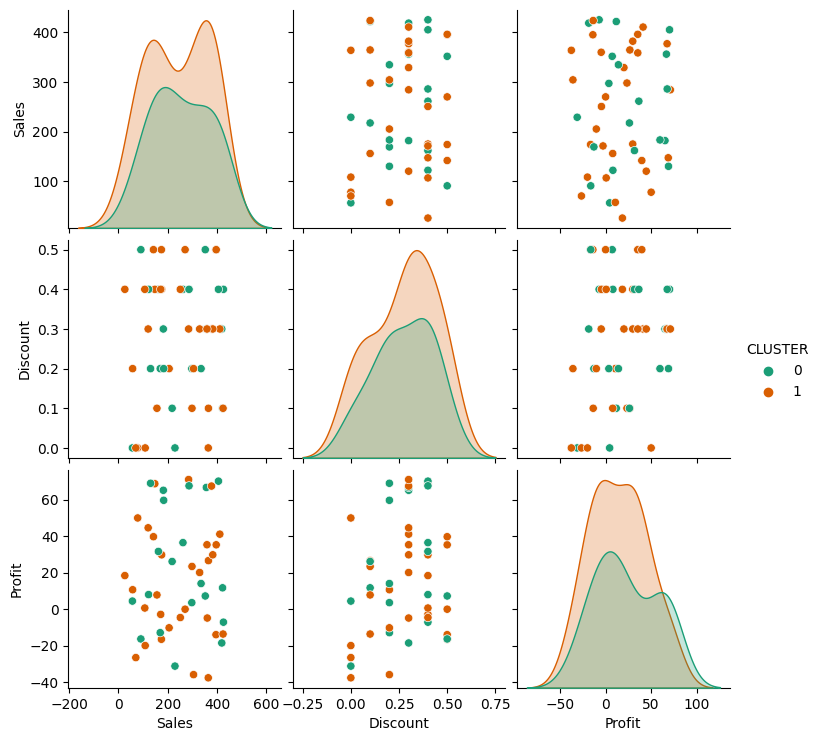

In [46]:
# make a Seaborn pairplot
sns.pairplot(data=df3[best_feat], hue='CLUSTER', palette= 'Dark2', diag_kind='kde')

In [51]:
df3['profit_ratio'] = ((df3['Profit'] / df3['Sales']) * 100)

In [52]:
df3.head()

,CLUSTER,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,profit_ratio
0,0,Standard Class,Home Office,Iowa,Central,Office Supplies,Fasteners,425.52,5.0,0.4,-7.03,-1.652096
1,0,First Class,Home Office,Louisiana,West,Furniture,Appliances,229.14,6.0,0.0,-31.07,-13.559396
2,1,Same Day,Corporate,Utah,Central,Technology,Labels,175.15,9.0,0.4,29.83,17.031116
3,0,First Class,Home Office,Colorado,Central,Furniture,Envelopes,161.98,6.0,0.4,31.69,19.564144
4,1,First Class,Corporate,Oklahoma,South,Office Supplies,Supplies,174.15,9.0,0.5,-16.39,-9.411427


1    30
0    20
Name: CLUSTER, dtype: int64

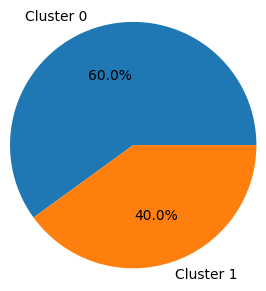

In [54]:
# Cluster distribution

plt.figure(figsize=(2,2))
plt.pie(df3['CLUSTER'].value_counts(),labels=['Cluster 0 ','Cluster 1'],autopct='%0.1f%%',radius=2)
df3['CLUSTER'].value_counts()